In [1]:
!pip install tweepy python-dotenv japanize_matplotlib wordcloud
#https://fonts.google.com/noto/specimen/Noto+Sans+JPをダウンロードしておく


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 KB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 5.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=25176d8b17960ea42446746c83a2f18f4aaebf7b7bcc733764ce439c85554041
  Stored in directory: /home/jovyan/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib


In [124]:
from dotenv import load_dotenv
import pickle
load_dotenv()

True

In [125]:
import tweepy
import os

client = tweepy.Client(bearer_token=os.getenv("bearer_token"),
                    consumer_key=os.getenv("api_key"),
                    consumer_secret = os.getenv("api_key_secret"),
                    access_token=os.getenv("access_token"), 
                    access_token_secret=os.getenv("access_token_secret"),
                    wait_on_rate_limit=True)


In [155]:
import pandas as pd
def get_df(client, target_hash_tag_string):
    query = f'lang:ja #{target_hash_tag_string} -is:retweet'
    print(query)

    tweets = tweepy.Paginator(client.search_recent_tweets, 
                                  query=query,
                                  tweet_fields=['author_id'],
                                  max_results=100).flatten(limit=1000)
    users = []
    for tweet in tweets:
        users.append(tweet.author_id)
    
    unique_users = list(set(users))
    print(len(unique_users))
    
    ing_df = []
    num_iter = int(len(unique_users)/100) + 1
    for i in range(num_iter):
        response = client.get_users(ids=unique_users[i*100:(i+1)*100], user_fields=['description', 'public_metrics'])
        for user_detail in response.data:
            ing_df.append({
            'user_id': user_detail.id,
            'user_name': user_detail.name,
            'description': user_detail.description,
            'followers': user_detail.public_metrics['followers_count'], 
            'following': user_detail.public_metrics['following_count'], 
            'tweet': user_detail.public_metrics['tweet_count'], 
            'listed': user_detail.public_metrics['listed_count']
        })
    df = pd.DataFrame(ing_df)
    return df

In [156]:
hash_1 = 'マーケティング'
hash_2 = 'データ分析'

In [157]:
df_1 = get_df(client, hash_1)
df_1.head()

lang:ja #マーケティング -is:retweet
348


,user_id,user_name,description,followers,following,tweet,listed
0,1457502561964290048,GDSC Osaka University,Googleの開発技術に興味がある阪大生向けの技術コミュニティです。身近な課題をテクノロジー...,251,379,192,1
1,1295912964860473344,岩松勇人の部屋@80時間の音声コンテンツを配信中,岩松勇人の頭の中。普通の人間が当たり前に考えている事\n（スマホ、スーパー、洋服、映画、恋人...,6959,7652,1794,24
2,1110808220740669440,NoxInfluencer日本公式,ノックスインフルエンサー日本公式アカウント。YouTube、Instagram、TikTok...,181,92,572,1
3,1530454679829655555,toshi🌻上場企業のWEBマーケター🌻,🌻一部上場企業勤務のWEBマーケター🌻\n有料級のWEB情報や、なるほどな！\nとなるような...,9,104,5,0
4,1295153213507739649,前原@訪問看護・介護の集客に特化したコンサルタント,訪問看護と訪問介護の集客に特化した経営コンサルタント。零細から上場クライアントと幅広く担当。...,1164,779,1499,9


In [158]:
df_2 = get_df(client, hash_2)
df_2.head()

lang:ja #データ分析 -is:retweet
81


,user_id,user_name,description,followers,following,tweet,listed
0,1349420323771277312,データ競馬倶楽部@6月の回収率211％と好調維持！,Kのデータ競馬倶楽部へようこそ👍データ競馬倶楽部では競馬予想と競馬予想に必要なデータを提供し...,773,10,148,0
1,1368070074976804865,下トl,小説家になろうやカクヨムなどで気になった小説のレビューやランキングの傾向分析をやっています。,41,65,329,1
2,1545533950113751042,はやてれお@Python使い,20代の社会人研究者。実務で役立つpythonスキル(https://t.co/mMYd5T...,26,82,5,0
3,1172738508756094976,TAT@ブログと株で資産形成中,オニールとミネルヴィニの投資手法を日本株に応用中 アメリカ株は長期投資 Pythonで情報収...,2199,28,33499,28
4,1413027794733338626,TomoCode | Pythonでデータ分析,#データ分析 や #機械学習 が身につくためのツイートをしてるよ〜/ 僕をフォローして一緒に...,1151,777,522,4


In [159]:
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib

%config InlineBackend.figure_formats = {'png', 'retina'}

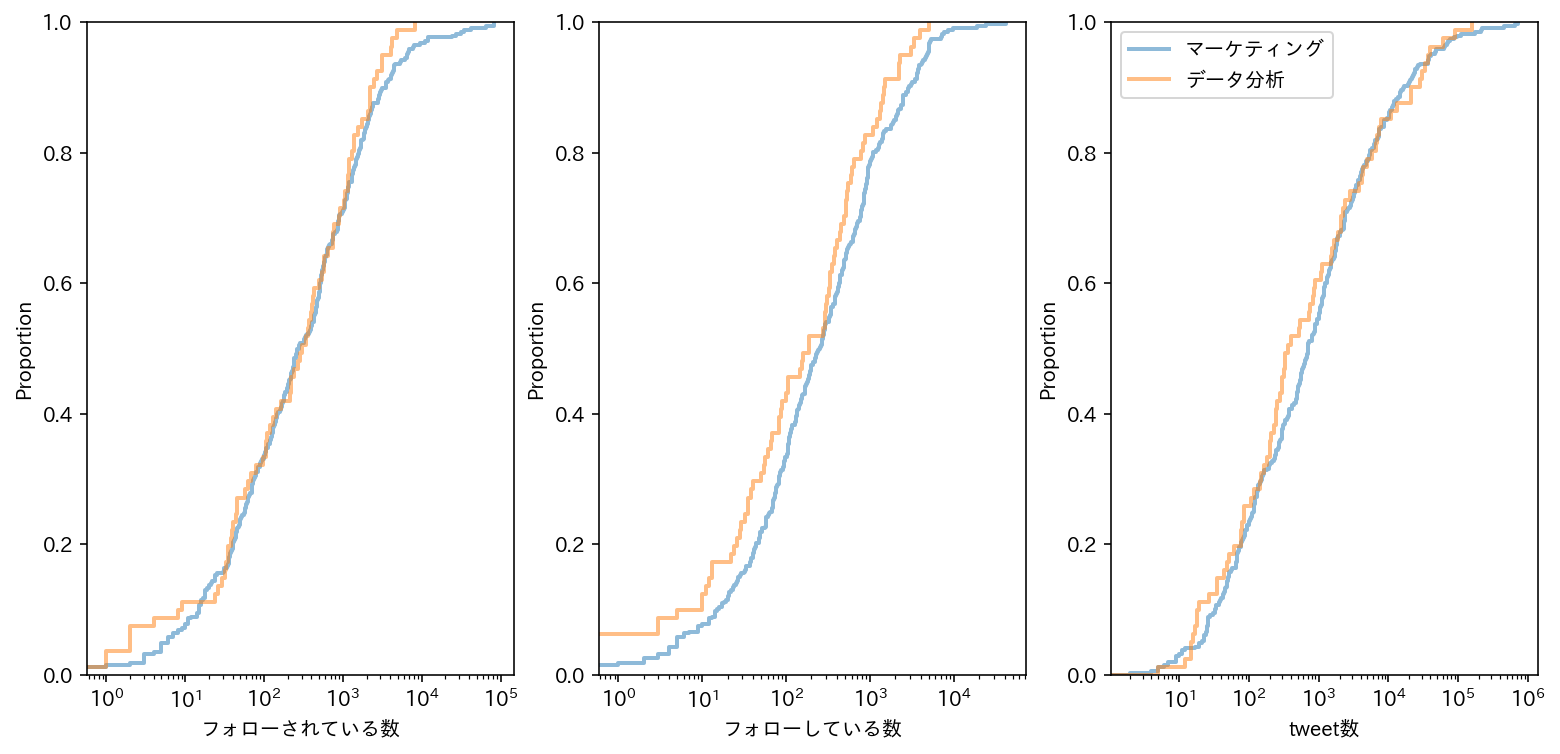

In [169]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 3, 1)
sns.ecdfplot(x="followers", data=df_1, ax=ax, label=hash_1, alpha=0.5, lw=2)
sns.ecdfplot(x="followers", data=df_2, ax=ax, label=hash_2, alpha=0.5, lw=2)
ax.set(xscale='log', xlabel='フォローされている数')

ax = fig.add_subplot(1, 3, 2)
sns.ecdfplot(x="following", data=df_1, ax=ax, label=hash_1, alpha=0.5, lw=2)
sns.ecdfplot(x="following", data=df_2, ax=ax, label=hash_2, alpha=0.5, lw=2)
ax.set(xscale='log', xlabel='フォローしている数')

ax = fig.add_subplot(1, 3, 3)
sns.ecdfplot(x="tweet", data=df_1, ax=ax, label=hash_1, alpha=0.5, lw=2)
sns.ecdfplot(x="tweet", data=df_2, ax=ax, label=hash_2, alpha=0.5, lw=2)
ax.set(xscale='log', xlabel='tweet数', )

plt.legend()

In [34]:
!pip install mecab-python3
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 7.8 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658836 sha256=aaf70de1d74e82727ac7e997d07f54eb122f6699facb532f21faf615954c2b04
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/9c/4f/2c115e896b4b6c584039ca19de3581d333856782ef108cdc5c
Successfully built unidic-lite


In [161]:
import MeCab
wakati = MeCab.Tagger("-Owakati")

In [162]:
def extract_word(text, wakati):
    targets = ('動詞', '形容詞', '名詞')
    node = wakati.parseToNode(text)
    words = []
    while node:
        term = node.surface # 単語
        pos = node.feature.split(',')[0] # 品詞
        if pos in targets:
            words.append(term)
        node = node.next
    return list(set(words))


In [163]:
df_1.description.apply(extract_word, wakati=wakati).explode().value_counts().head(30)

し          198
マーケティング    120
情報          73
発信          70
会社          66
する          57
年           55
https       55
t           55
co          55
い           49
企業          46
公式          43
アカウント       43
ビジネス        42
フォロー        42
Web         42
1           41
人           40
株式          37
3           37
DM          35
支援          34
こと          34
仕事          33
事業          31
いる          31
いき          30
ください        30
サービス        29
Name: description, dtype: int64

In [164]:
df_2.description.apply(extract_word, wakati=wakati).explode().value_counts().head(30)

し          46
データ        32
分析         23
情報         19
い          17
https      16
co         16
t          16
アカウント      13
する         12
年          12
会社         12
発信         12
公式         11
株式         11
Python     10
いき         10
企業          9
1           9
ください        9
2           8
IT          8
AI          8
マーケティング     8
いる          7
ブログ         7
大学          7
つい          7
エンジニア       7
サイエンス       7
Name: description, dtype: int64

In [62]:
df.description.apply(extract_word, wakati=wakati)

0       [まとめ, https, t, 22, co, hmhaqqkk, 荒野, サイト, You...
1       [プログラム, アソシエイト, し, いき, Amazon, あげ, すすめ, フォロー, ...
2       [プログラム, アソシエイト, 楽しく, し, ゲーム, 毎日, すごし, Amazon, ...
3       [スナイパー, しよう, クエ, し, 6, ゲーム, by, フォト, 楽し, すぎる, ...
4       [cora, 思う, プロスピ, rca, 受験, 野球, やっ, ファン, サッカー, 所...
                              ...                        
1183    [199, o, すん, ミラティブ, ふ, ﾟ, m, ポケモン, バウンティラッシュ, ...
1184    [on, sucker, focus, The, when, is, reverse, t,...
1185    [DM, 増え, し, 無言, 暇人, w, 話す, フォロワー, 失礼, いい, フォロー...
1186     [面白い, ツイート, 美容, ファッション, 頑張る, やっ, できる, フォロバ, 100]
1187    [LFTA, ナイト, フォロバ, EpikWhale, tN, respect, t, Z...
Name: description, Length: 1188, dtype: object

In [166]:
from wordcloud import WordCloud


wc = WordCloud(width=1920, height=1080,
               font_path="../data/fonts/NotoSansJP-Bold.otf",
               max_words=500,
               background_color="white")

In [167]:
wc.generate(' '.join(list(kakedashi_df.description.apply(extract_word, wakati=wakati).explode().astype(str))))
wc.to_file('../figures/df_1.png')
wc.generate(' '.join(list(syoshinsya_df.description.apply(extract_word, wakati=wakati).explode().astype(str))))
wc.to_file('../figures/df_2.png')